# Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Superposition of Random Signals

The superposition of two random signals 

$$y[k] = x[k] + n[k]$$ 

is a frequently applied operation in statistical signal processing. For instance to model the distortions of a measurement procedure or communication channel. We assume that the statistical properties of the real-valued signals $x[k]$ and $n[k]$ are known. We are interested in the statistical properties of $y[k]$, as well as the joint statistical properties between the signals and their superposition $y[k]$. For the following derivations it is assumed that $x[k]$ and $n[k]$ are drawn from weakly stationary real-valued random processes. 

### Cumulative Distribution and Probability Density Function

The cumulative distribution function (CDF) $P_y(\theta)$ of $y[k]$ is given by rewriting it in terms of the joint probability density function (PDF) $p_{xn}(\theta_x, \theta_n)$

$$ P_y(\theta) = \Pr \{ y[k] \leq \theta \} = \Pr \{ (x[k] + n[k]) \leq \theta \} =
\int\limits_{-\infty}^{\infty} \int\limits_{-\infty}^{\theta - \theta_n} p_{xn}(\theta_x, \theta_n) \; \mathrm{d}\theta_x\,\mathrm{d}\theta_n $$

The PDF is derived by introducing above result into [its definition](distributions.ipynb#Univariate-Probability-Density-Function) as

$$ p_y(\theta) = \frac{\mathrm{d} P_y(\theta)}{\mathrm{d}\theta} = \int\limits_{-\infty}^{\infty} p_{xn}(\theta - \theta_n, \theta_n) \; \mathrm{d}\theta_n$$

since the inner integral on the right hand side of $P_y(\theta)$ can be interpreted as the inverse operation to the derivation with respect to $\theta$.

An important special case is that $x[k]$ and $n[k]$ are uncorrelated. Under this assumption the joint PDF $p_{xn}(\theta_x, \theta_n)$ can be written as $p_{xn}(\theta_x, \theta_n) = p_x(\theta_x) \cdot p_n(\theta_n)$. For $p_y(\theta)$ follows

$$ p_y(\theta) = p_x(\theta) * p_n(\theta)$$

Hence, the PDF of the superposition is given by the convolution of the PDFs of both signals.

#### Example

The following example estimates the PDF of a superposition of two uncorrelated signals drawn from [uniformly distributed](important_distributions.ipynb#Uniform-Distribution) white noise sources with $a=0$ and $b=1$.

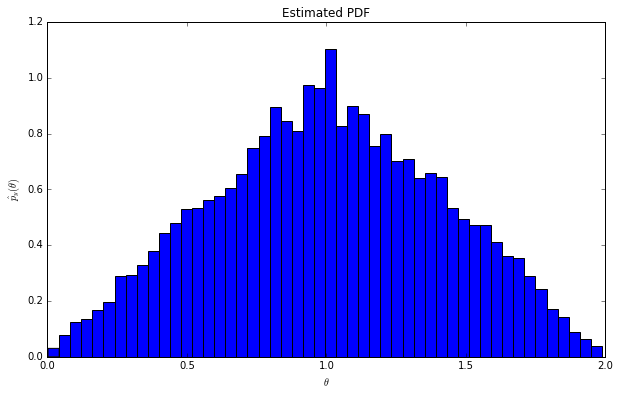

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10000  # length of random signals

# generate random signals
x = np.random.uniform(size=N)
n = np.random.uniform(size=N)
y = x + n

# plot estimated pdf
plt.figure(figsize = (10, 6))
plt.hist(y, 50, normed=True)
plt.title('Estimated PDF')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat{p}_y(\theta)$');

**Exercise**

* Check the result of the numerical simulation by calculating the theoretical PDF of $y[k]$

### Linear Mean

The linear mean $\mu_y$ of the superposition is derived by introducing $y[k] = x[k] + n[k]$ into the [definition of the linear mean](ensemble_averages.ipynb#Linear-mean) and exploiting the [linearity of the expectation operator](ensemble_averages.ipynb#Properties) as

$$ \mu_y[k] = E \{ x[k] + n[k] \} = \mu_x[k] + \mu_n[k] $$

The linear mean of the superposition of two random signals is the superposition of its linear means.

### Auto-Correlation Function and Power Spectral Density

The ACF is computed in the same manner as above by inserting the superposition into its [definition](correlation_functions.ipynb#Auto-Correlation-Function) and rearranging terms

\begin{align}
\varphi_{yy}[\kappa] &= E\{ y[k] \cdot y[k-\kappa] \} \\
&= E\{ (x[k] + n[k]) \cdot (x[k-\kappa] + n[k-\kappa]) \} \\
&= \varphi_{xx}[\kappa] + \varphi_{xn}[\kappa] + \varphi_{nx}[\kappa] + \varphi_{nn}[\kappa] 
\end{align}

The ACF of the superposition of two random signals is given as the superposition of all auto- and cross-correlation functions (CCFs) of the two random signals. The power spectral density (PSD) is derived by discrete-time Fourier transformation (DTFT) of the ACF

$$ \Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{xn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{nx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) $$

This can be simplified further by exploiting the symmetry property of the CCFs $\varphi_{xn}[\kappa] = \varphi_{nx}[-\kappa]$ and the DTFT for real-valued signals as

$$ \Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + 2\,\Re \{ \Phi_{xn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \} + \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) $$

where $\Re \{ \cdot \}$ denotes the real part of its argument.

### Cross-Correlation Function and Cross Power Spectral Density

The CCF $\varphi_{ny}[\kappa]$ between the random signal $n[k]$ and the superposition $y[k]$ is derived again by introducing the superposition into the [definition of the CCF](correlation_functions.ipynb#Cross-Correlation-Function)

$$ \varphi_{ny}[\kappa] = E\{ n[k] \cdot (x[k-\kappa] + n[k-\kappa]) \} = \varphi_{nx}[\kappa] + \varphi_{nn}[\kappa] $$

It is given as the superposition of the CCF between the two random signals and the ACF of $n[k]$. The cross PSD is derived by applying a DTFT to $\varphi_{ny}[\kappa]$

$$ \Phi_{ny}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{nx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$$

The CCF $\varphi_{xy}[\kappa]$ and cross PSD $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ can be derived by exchanging the signals $n[k]$ and $x[k]$

$$ \varphi_{xy}[\kappa] = E\{ x[k] \cdot (x[k-\kappa] + n[k-\kappa]) \} = \varphi_{xx}[\kappa] + \varphi_{xn}[\kappa] $$

and

$$ \Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{xn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$$

### Additive White Gaussian Noise

In order to model the effect of distortions it is often assumed that a random signal $x[k]$ is distorted by additive normal distributed white noise resulting in the observed signal $y[k] = x[k] + n[k]$. It is furthermore assumed that the noise $n[k]$ is uncorrelated to the signal $x[k]$. This model is known as [additive white Gaussian noise](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise) (AWGN) model. 

For zero-mean random processes it follows $\varphi_{xn}[\kappa] = \varphi_{nx}[\kappa] = 0$ and $\varphi_{nn}[\kappa] = N_0 \cdot \delta[\kappa]$ from the properties of the AWGN model. Introducing this into the findings for additive random signals yields the following relations for the AWGN model

\begin{align}
\varphi_{yy}[\kappa] &= \varphi_{xx}[\kappa] + N_0 \cdot \delta[\kappa] \\
\varphi_{ny}[\kappa] &= N_0 \cdot \delta[\kappa] \\
\varphi_{xy}[\kappa] &= \varphi_{xx}[\kappa]
\end{align}

The PSDs are given as the DTFT of these results. The AWGN model is frequently applied in communications as well as measurement of physical quantities to cope for background, sensor and amplifier noise.

#### Example

For the following numerical example, the disturbance of a harmonic signal $x[k] = \cos[\Omega_0 k]$ by unit variance AWGN is considered.

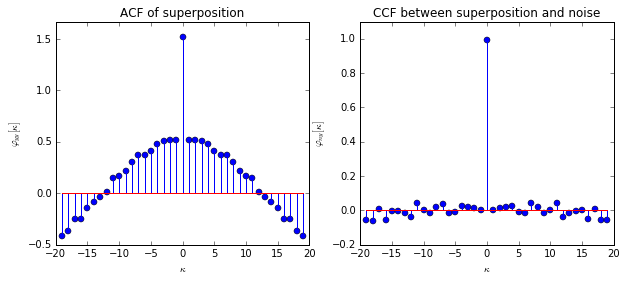

In [2]:
N = 1024  # length of signals
K = 20  # maximum lag for ACF/CCF

# generate signals
x = np.cos(20*2*np.pi/N*np.arange(N))
n = np.random.normal(size=N)
# superposition of signals
y = x + n

# compute and truncate ACF of superposition
acf = 1/N * np.correlate(y, y, mode='full')
acf = acf[(len(x)-1)-(K-1):(len(x)-1)+K]
# compute and truncate CCF of superposition and noise
ccf = 1/N * np.correlate(n, y, mode='full')
ccf = ccf[(len(x)-1)-(K-1):(len(x)-1)+K]


# plot results
kappa = np.arange(-(K-1), K)
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.stem(kappa, acf)
plt.title('ACF of superposition')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\varphi_{yy}[\kappa]$')
plt.axis([-K, K, -.5, 1.1*np.max(acf)])

plt.subplot(122)
plt.stem(kappa, ccf)
plt.title('CCF between superposition and noise')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\varphi_{ny}[\kappa]$')
plt.axis([-K, K, -.2, 1.1]);

**Exercise**

* Derive the theoretic result for $\varphi_{xx}[\kappa]$
* Based in this, can you explain the results of the numerical simulation?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>